In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'amd' # ticker symbol
train = 0 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1, 3, or 5 days ahead
days_back = -1 # -1 for current data point, -2 for two days ago, etc...
cv = 5 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'a': '11/15/1999'# Updated 1/5/21 1D, 3D, 5D ahead
               , 'aapl':'12/12/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'acy': '01/18/1998' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'adbe': '08/11/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'amd': '03/17/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'baba': '09/15/2014' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'bac': '02/19/1973' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'crm': '06/23/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'esgv': '09/16/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'goog': '08/16/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ibm': '01/02/1962' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'idex': '05/23/2007' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'intc': '03/16/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'iyw': '05/15/2000' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ma': '05/21/2006' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'msft': '03/10/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nio': '09/10/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nvda': '01/22/1999' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'pypl': '07/05/2015' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'tsla': '06/29/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'v': '03/16/2008' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbiv': '09/04/2002' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbr': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'viov': '09/06/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vgt': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
              }

In [4]:
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-21,95.279999,91.080002,94.250000,93.230003,47093900.0,93.230003,0.010822,0.046113,-0.028044,0.019003,-0.003148,1
2020-12-22,93.550003,90.529999,93.360001,93.160004,35673700.0,93.160004,0.002142,0.033359,-0.000751,0.011682,-0.008236,-1
2020-12-23,93.129997,91.459999,93.080002,91.550003,25993300.0,91.550003,0.016437,0.018259,-0.017282,0.011789,-0.011136,1
2020-12-24,92.510002,91.309998,91.800003,91.809998,16705900.0,91.809998,-0.000109,0.013142,0.002840,0.012528,-0.010547,-1
2020-12-28,93.139999,90.820000,92.930000,91.599998,30627300.0,91.599998,0.014312,0.025545,-0.002287,0.013082,-0.009105,-1
2020-12-29,92.459999,89.430000,91.660004,90.620003,31748200.0,90.620003,0.011346,0.033881,-0.010699,0.008188,-0.005636,1
2020-12-30,92.849998,90.190002,90.779999,92.290001,25845000.0,92.290001,-0.016634,0.029493,0.018429,0.013692,-0.001800,-1
2020-12-31,92.300003,90.870003,92.099998,91.709999,24920500.0,91.709999,0.004235,0.015737,-0.006285,0.011248,0.000400,1
2021-01-04,96.059998,90.919998,92.110001,92.300003,51758900.0,92.300003,-0.002063,0.056533,0.006433,0.011554,0.001118,-1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
if train == 1:
    a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)
elif train == 0:
    pass

In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

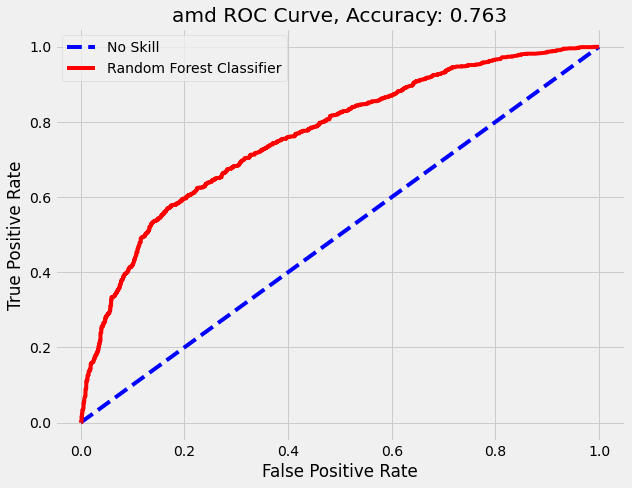

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

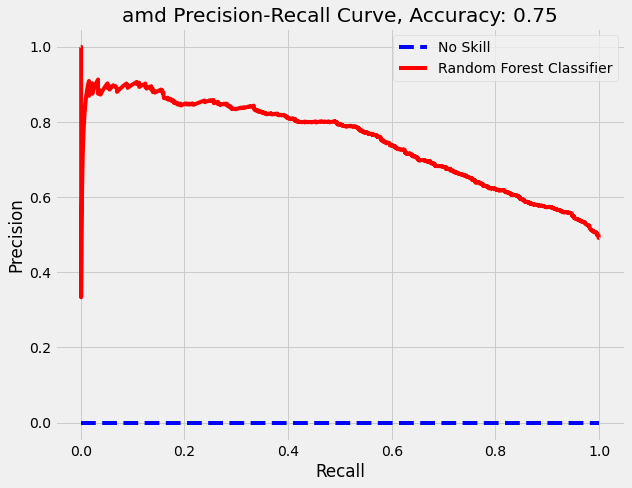

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

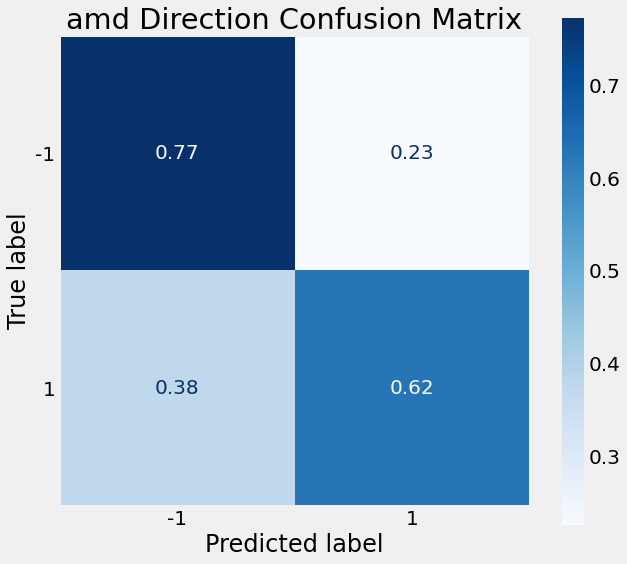

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.6875060768108896'

### Prediction...

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High          9.320770e+01
Low           9.141000e+01
Open          9.210000e+01
Close         9.277000e+01
Volume        3.366589e+07
Adj Close     9.277000e+01
oc           -7.274682e-03
hl            1.966633e-02
adj           5.092021e-03
5stdev_adj    1.148083e-02
5sma_adj      2.594154e-03
direction    -1.000000e+00
Name: 2021-01-05 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-days_back]
last

oc            0.000000
hl            0.077551
5stdev_adj    0.034110
5sma_adj     -0.029426
Name: 1980-03-25 00:00:00, dtype: float64

In [13]:
stock_df['adj'].describe()

count    10285.000000
mean         0.001049
std          0.037724
min         -0.379310
25%         -0.018433
50%          0.000000
75%          0.019608
max          0.522901
Name: adj, dtype: float64

In [14]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name} {days_ahead} day(s) ahead')
else:
    print(f'Sell or hold {stock_name} {days_ahead} day(s) ahead')

Buy amd 1 day(s) ahead


### Strategy Returns...

In [15]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [16]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-29,92.459999,89.430000,91.660004,90.620003,31748200.0,90.620003,0.011346,0.033881,-0.010699,0.008188,-0.005636,1,1,0.018429
2020-12-30,92.849998,90.190002,90.779999,92.290001,25845000.0,92.290001,-0.016634,0.029493,0.018429,0.013692,-0.001800,-1,-1,0.006285
2020-12-31,92.300003,90.870003,92.099998,91.709999,24920500.0,91.709999,0.004235,0.015737,-0.006285,0.011248,0.000400,1,-1,-0.006433
2021-01-04,96.059998,90.919998,92.110001,92.300003,51758900.0,92.300003,-0.002063,0.056533,0.006433,0.011554,0.001118,-1,-1,-0.005092
2021-01-05,93.207703,91.410004,92.099998,92.769997,33665892.0,92.769997,-0.007275,0.019666,0.005092,0.011481,0.002594,-1,-1,-0.000000


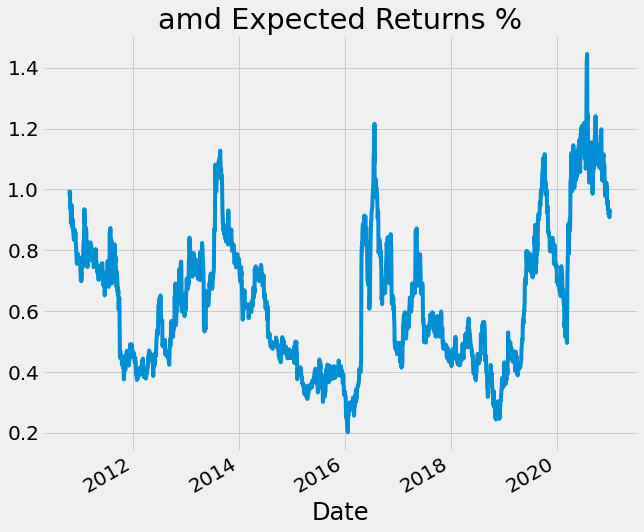

In [17]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [18]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

8.51134905523736

In [19]:
# multiple times original investment, not bad but...

In [20]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) / stock_df['Close'][-test_idx]

16.259534259175144

In [21]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/

### Training

In [22]:
# this takes a while, 10.5+ hours!
# stocks = [x for x in start_dates]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

### Recording Results